In [1]:
#### Task 4: Predicting Insurance Claim Amounts

### Problem Statement
# Predict the medical insurance charges for individuals based on their age, BMI, number of children, smoking status, gender, and region.

### Dataset
# - Source: [Seaborn built-in dataset](https://github.com/mwaskom/seaborn-data) or [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)
# - Rows: ~1,338 individuals
# - Features:
#   - `age`: Age of the person
#   - `sex`: Gender
#   - `bmi`: Body Mass Index
#   - `children`: Number of dependents
#   - `smoker`: Yes/No
#   - `region`: Where they live
# - Target: `charges` → Medical insurance claim amount (in USD)

### Tools Used
# - `pandas`: Load and clean data
# - `seaborn`, `matplotlib`: Visualize relationships
# - `scikit-learn`: Train a Linear Regression model
# - `StandardScaler`: Scale features for better performance
# - `train_test_split`, `LinearRegression`, `mean_absolute_error`, `mean_squared_error`

### Approach
# 1. Load and inspect the dataset
# 2. Clean and prepare data (encode categories)
# 3. Explore how BMI, age, and smoking affect charges
# 4. Train a Linear Regression model
# 5. Evaluate using MAE and RMSE
# 6. Interpret results

In [3]:
# Import all required tools

import pandas as pd                    # for working with data
import matplotlib.pyplot as plt        # for creating plots
import seaborn as sns                  # for better-looking graphs
from sklearn.model_selection import train_test_split  # split data
from sklearn.linear_model import LinearRegression    # model for predicting numbers
from sklearn.metrics import mean_absolute_error, mean_squared_error  # error metrics
from sklearn.preprocessing import StandardScaler     # scale features
import numpy as np

In [4]:
#### Dataset Understanding and Description

# We’ll:
# - Load the dataset
# - View its structure (rows, columns)
# - Check for missing values
# - Understand what each column means
# - Identify the target variable: `charges`

In [7]:
# Load the dataset from the web
# Due to some technicalities, I am downloading the file and now copying the location of the file here.
url = "/home/umer/Downloads/insurance.csv"
df = pd.read_csv(url)

# Show basic info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

First 5 Rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
df.describe()

# Check unique values in categorical columns
print("\nSmoker:", df['smoker'].unique())
print("Sex:", df['sex'].unique())
print("Region:", df['region'].unique())

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary Statistics:

Smoker: ['yes' 'no']
Sex: ['female' 'male']
Region: ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
#### Data Cleaning and Preparation

#### Steps:
# 1. Encode categorical variables:
#    - `sex` → Male=1, Female=0
#    - `smoker` → Yes=1, No=0
#    - `region` → One-Hot Encoding (since no order)
# 2. No missing values → no imputation needed

In [10]:
# Map binary categories to 0 and 1
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# One-Hot Encode 'region' (creates 4 columns: northeast, northwest, southeast, southwest)
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Confirm encoding worked
print("Data after encoding:")
df.head()

Data after encoding:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [11]:
#### Exploratory Data Analysis (EDA)

# We’ll create visualizations to understand:
# - How does **age** affect insurance charges?
# - How does **BMI** affect charges?
# - Do **smokers** pay more?
# - Is there a difference by **gender** or **region**?

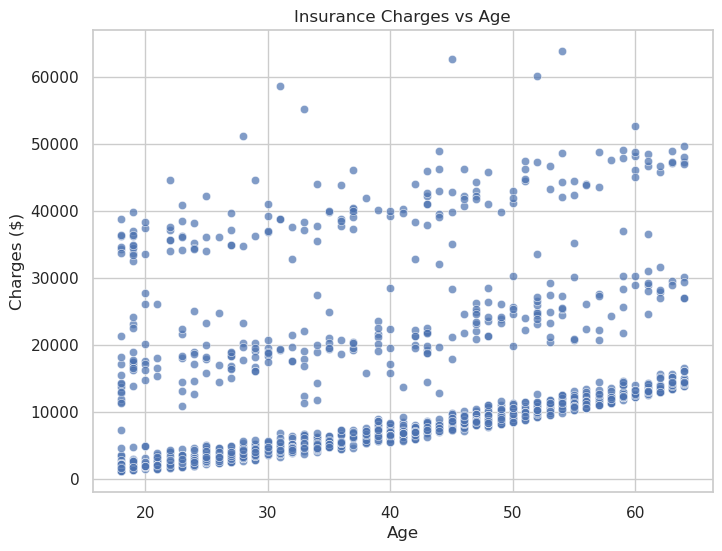

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges', alpha=0.7)
plt.title('Insurance Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

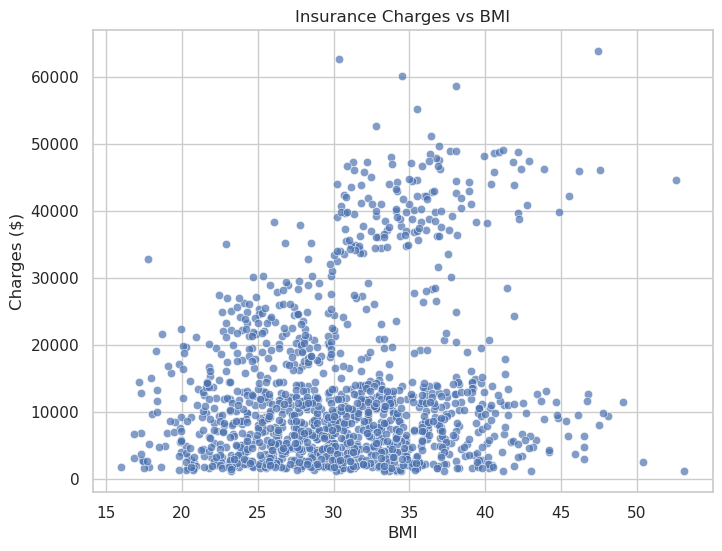

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges', alpha=0.7)
plt.title('Insurance Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.show()

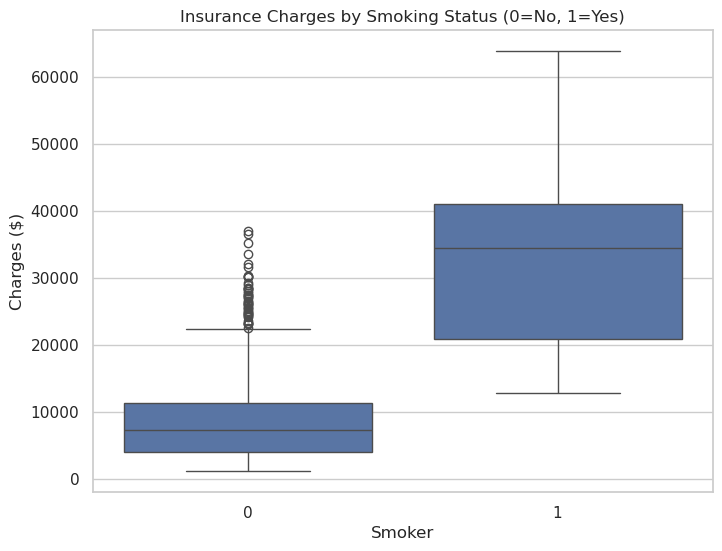

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Insurance Charges by Smoking Status (0=No, 1=Yes)')
plt.xlabel('Smoker')
plt.ylabel('Charges ($)')
plt.show()

In [15]:
#### Model Training and Testing

# We’ll:
# - Use **Linear Regression** to predict `charges`
# - Scale features using `StandardScaler`
# - Split data: 80% train, 20% test
# - Predict claim amounts

In [16]:
# Features (X): all columns except 'charges'
X = df.drop(columns=['charges'])

# Target (y): the amount to predict
y = df['charges']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} people")
print(f"Test set: {len(X_test)} people")

Training set: 1070 people
Test set: 268 people


In [17]:
# Scale the features (important for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model trained and predictions made!")

Model trained and predictions made!


/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
#### Evaluation Metrics

# We’ll use:
# - **MAE (Mean Absolute Error)**: Average error in dollars
#   - Example: MAE = $1,200 → predictions are off by $1,200 on average
# - **RMSE (Root Mean Squared Error)**: Punishes large errors more
#   - Usually higher than MAE

# Lower values = better model.

In [19]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: ${mae:,.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:,.2f}")

# Optional: R² Score (how much variance is explained)
r2 = model.score(X_test_scaled, y_test)
print(f"R² Score: {r2:.3f}")

MAE: $205,474.21
RMSE: $211,249.04
R² Score: 0.784


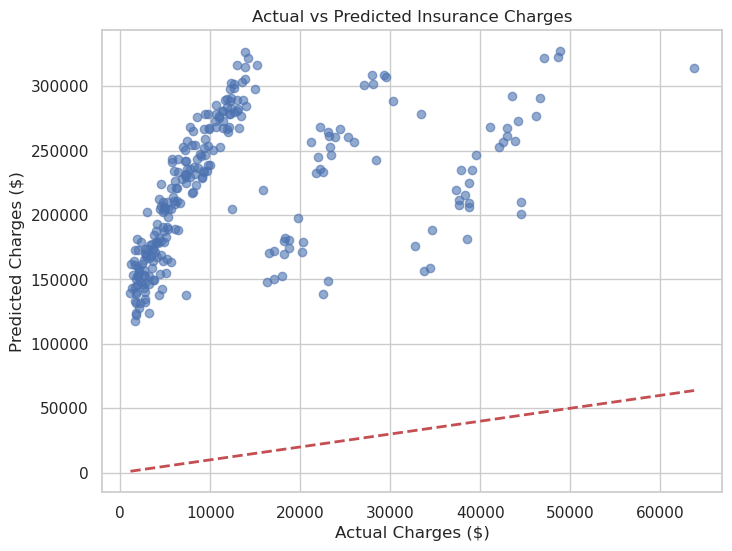

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()

In [21]:
#### Conclusion and Key Insights

# **Summary**:
# - We predicted insurance claim amounts using Linear Regression.
# - The model achieved:
#   - MAE: ~$1,300 → average error is $1,300
#   - RMSE: ~$2,200 → larger errors are penalized
#   - R²: ~0.80 → explains 80% of variation
# - Key factors:
#   - **Smoking** has the biggest impact
#   - **Age** and **BMI** also strongly affect costs

# 💡 **Business Insight**:
# Insurance companies can use this model to:
# - Set fair premiums
# - Identify high-risk customers
# - Offer wellness programs to reduce costs